## 0. Importar bibliotecas

In [31]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from funpymodeling import status, freq_tbl


## 1. Cargar datos

In [32]:
data = pd.read_csv("../data/water_potability.csv", sep=",")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [33]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [34]:
data.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [35]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ph,491,0.149878,1,0.000305,2785,float64
1,Hardness,0,0.000000,0,0.000000,3276,float64
2,Solids,0,0.000000,0,0.000000,3276,float64
3,Chloramines,0,0.000000,0,0.000000,3276,float64
4,Sulfate,781,0.238400,0,0.000000,2495,float64
5,Conductivity,0,0.000000,0,0.000000,3276,float64
6,Organic_carbon,0,0.000000,0,0.000000,3276,float64
7,Trihalomethanes,162,0.049451,0,0.000000,3114,float64
8,Turbidity,0,0.000000,0,0.000000,3276,float64
9,Potability,0,0.000000,1998,0.609890,2,int64


## 2. Preparación de datos

In [36]:
data["ph"] , ph_bins = pd.qcut(data["ph"], retbins=True, q=5)
data["Trihalomethanes"] , Trihalomethanes_bins = pd.qcut(data["Trihalomethanes"], retbins=True, q=5)
data["Sulfate"] , Sulfate_bins = pd.qcut(data["Sulfate"], retbins=True, q=5)


In [37]:
freq_tbl(data["ph"])

,ph,frequency,percentage,cumulative_perc
0,"(-0.001, 5.822]",557,0.170024,0.2
1,"(5.822, 6.702]",557,0.170024,0.4
2,"(6.702, 7.437]",557,0.170024,0.6
3,"(7.437, 8.311]",557,0.170024,0.8
4,"(8.311, 14.0]",557,0.170024,1.0


In [38]:
freq_tbl(data["Trihalomethanes"])

,Trihalomethanes,frequency,percentage,cumulative_perc
0,"(0.737, 53.107]",623,0.190171,0.200064
1,"(53.107, 62.656]",623,0.190171,0.400128
2,"(70.446, 79.701]",623,0.190171,0.600193
3,"(79.701, 124.0]",623,0.190171,0.800257
4,"(62.656, 70.446]",622,0.189866,1.000000


In [39]:
data["ph"] = data["ph"].cat.add_categories("desconocido")
data["Trihalomethanes"] = data["Trihalomethanes"].cat.add_categories("desconocido")
data["Sulfate"] = data["Sulfate"].cat.add_categories("desconocido")

In [40]:
data["ph"] = data["ph"].fillna(value="desconocido")
data["Trihalomethanes"] = data["Trihalomethanes"].fillna(value="desconocido")
data["Sulfate"] = data["Sulfate"].fillna(value="desconocido")

In [41]:
freq_tbl(data["ph"])

,ph,frequency,percentage,cumulative_perc
0,"(-0.001, 5.822]",557,0.170024,0.170024
1,"(5.822, 6.702]",557,0.170024,0.340049
2,"(6.702, 7.437]",557,0.170024,0.510073
3,"(7.437, 8.311]",557,0.170024,0.680098
4,"(8.311, 14.0]",557,0.170024,0.850122
5,desconocido,491,0.149878,1.000000


In [42]:
data_ohe = pd.get_dummies(data)
data_ohe

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,"ph_(-0.001, 5.822]","ph_(5.822, 6.702]","ph_(6.702, 7.437]",...,"Sulfate_(323.531, 342.095]","Sulfate_(342.095, 367.369]","Sulfate_(367.369, 481.031]",Sulfate_desconocido,"Trihalomethanes_(0.737, 53.107]","Trihalomethanes_(53.107, 62.656]","Trihalomethanes_(62.656, 70.446]","Trihalomethanes_(70.446, 79.701]","Trihalomethanes_(79.701, 124.0]",Trihalomethanes_desconocido
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0,True,False,False,...,False,False,False,True,False,True,False,False,False,False
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1,True,False,False,...,False,True,False,False,False,False,True,False,False,False
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1,True,False,False,...,False,False,False,True,False,False,False,True,False,False


## 3. Modelo de Clasificación

In [43]:
data_x = data_ohe.drop("Potability",axis=1)
data_y = data_ohe["Potability"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

In [45]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=99)

In [46]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=99)

## 4. Guardar modelo y columnas ohe

In [47]:
with open("categorias_ohe.pkl","wb") as handle:
    pickle.dump(data_x.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
pickle.dump(rf_model, open("model/rf.pkl", 'wb'))

In [49]:

with open("saved_bins/ph_bins.pkl","wb") as handle:
    pickle.dump(ph_bins, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open("saved_bins/Trihalomethanes_bins.pkl","wb") as handle:
    pickle.dump(Trihalomethanes_bins, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open("saved_bins/Sulfate_bins.pkl","wb") as handle:
    pickle.dump(Sulfate_bins, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [50]:
rf_loaded = pickle.load(open("model/rf.pkl", 'rb'))

## 5. Class prediction and score

In [51]:
rf_model.predict(x_train)

array([1, 0, 0, ..., 0, 1, 1])

In [52]:
pred_proba = rf_model.predict_proba(x_train)
pred_proba

array([[0.171, 0.829],
       [0.867, 0.133],
       [0.888, 0.112],
       ...,
       [0.822, 0.178],
       [0.226, 0.774],
       [0.248, 0.752]])

In [53]:
y_prob_tr = pred_proba[:,1]
y_prob_tr

array([0.829, 0.133, 0.112, ..., 0.178, 0.774, 0.752])

## 6. Confusion Matrix

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

In [55]:
import seaborn as sns

In [56]:
import matplotlib.pyplot as plt

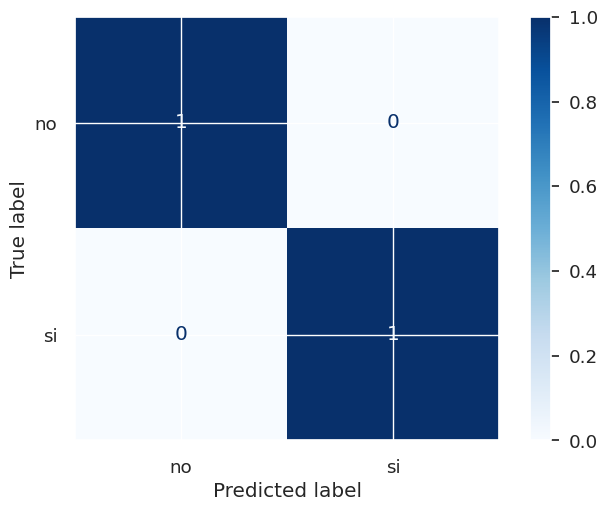

In [57]:
sns.set_theme(font_scale=1.2)

ConfusionMatrixDisplay.from_estimator(
        rf_model, x_train, y_train,
        display_labels = ["no","si"],
        cmap = "Blues",
        normalize = "true"
)

plt.savefig("../results/ConfusionMatrix.png")

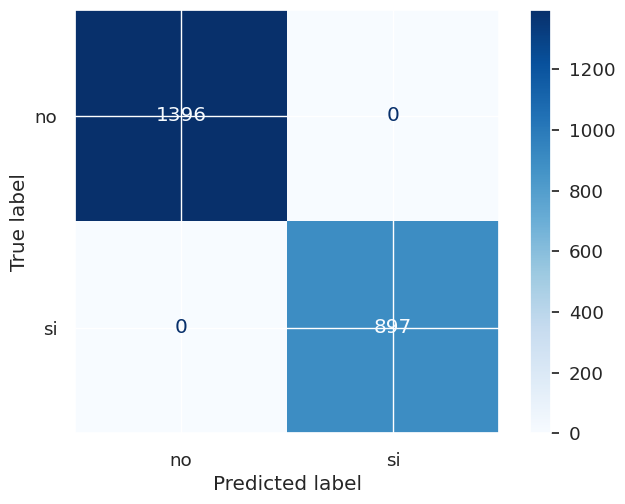

In [58]:
sns.set_theme(font_scale=1.2)

ConfusionMatrixDisplay.from_estimator(
        rf_model, x_train, y_train,
        display_labels = ["no","si"],
        cmap = "Blues"
)

/home/alumni/anaconda3/envs/bootcamp_venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

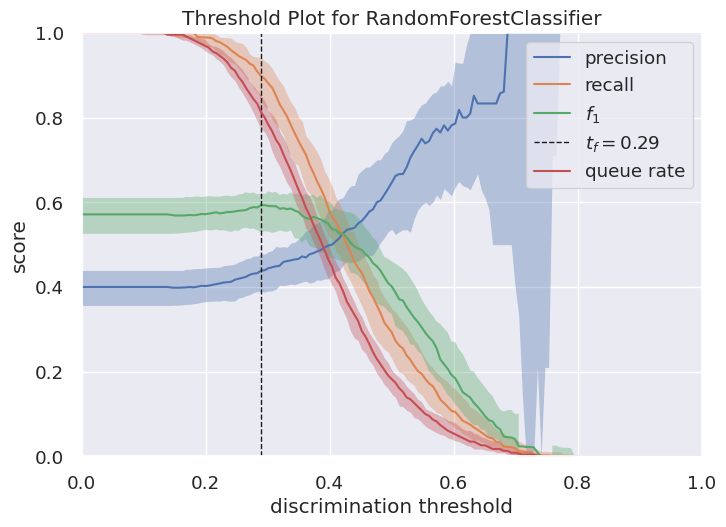

In [59]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf_model)

visualizer.fit(x_train,y_train)

visualizer.show(outpath="../results/DiscriminationThreshold.png")


## 7. ROC Curve

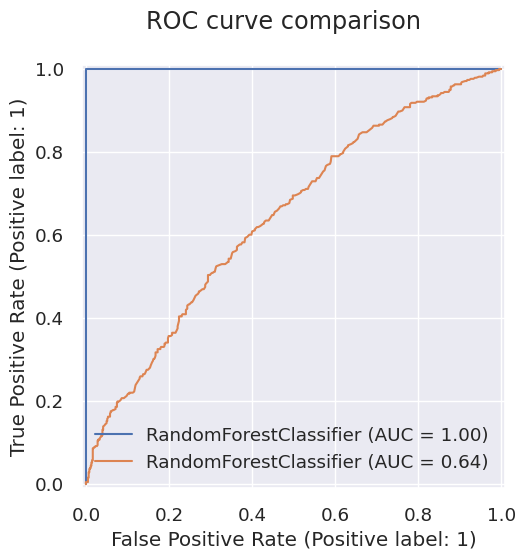

In [60]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf_model, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf_model, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.savefig("../results/ROCcurve.png")

plt.show()